In [121]:
import pdfplumber
import pandas as pd
print(pdfplumber.__version__)

0.11.4


In [122]:
def list_lines_with_properties(page):
    csv_path = "./csv/EXTRACTION.csv"
    data=[] 
    for obj in page.objects['line']:
        properties = {
            'linewidth': obj.get('linewidth', 1),
            'direction': 'horizontal' if obj.get('y0') == obj.get('y1') else 'vertical' if obj.get('x0') == obj.get('x1') else 'diagonal'
        }
        data.append(properties)
    df = pd.DataFrame(data)
    df.to_csv(csv_path, index=False)

In [123]:
def keep_visible_lines(obj):
    if obj['object_type'] == 'line':
        direction = 'horizontal' if obj.get('y0') == obj.get('y1') else 'vertical' if obj.get('x0') == obj.get('x1') else 'diagonal'
        y0 = obj.get('y0')
        top = obj.get('top')
        bottom = obj.get('bottom')
        linewidth = obj.get('linewidth')
   
        if direction == 'diagonal':
            return False
        
        if (top<20 or bottom>500.0):
            return False
        
        if linewidth == 0:
            return False
    return True

In [124]:
pdf = pdfplumber.open("./pdf/ELECTRICAL_LIGHT_INSTALL_DETAILS.pdf")
csv_path = "./csv/EXTRACTION.csv"

In [125]:
p0 = pdf.pages[58]

In [126]:
list_lines_with_properties(p0)

In [127]:
p0 = p0.filter(keep_visible_lines)

In [128]:
im = p0.to_image()

In [129]:
table_settings = {"vertical_strategy": "lines_strict",
                  "explicit_vertical_lines": [1185],
                  "explicit_horizontal_lines": [20, 500],
                  "intersection_y_tolerance": 6,
                  "snap_tolerance": 2}

In [130]:
table = p0.extract_table(table_settings)
# Filter out rows composed entirely of None or empty strings
table = [row for row in table[1:] if any(cell and cell.strip() for cell in row)]

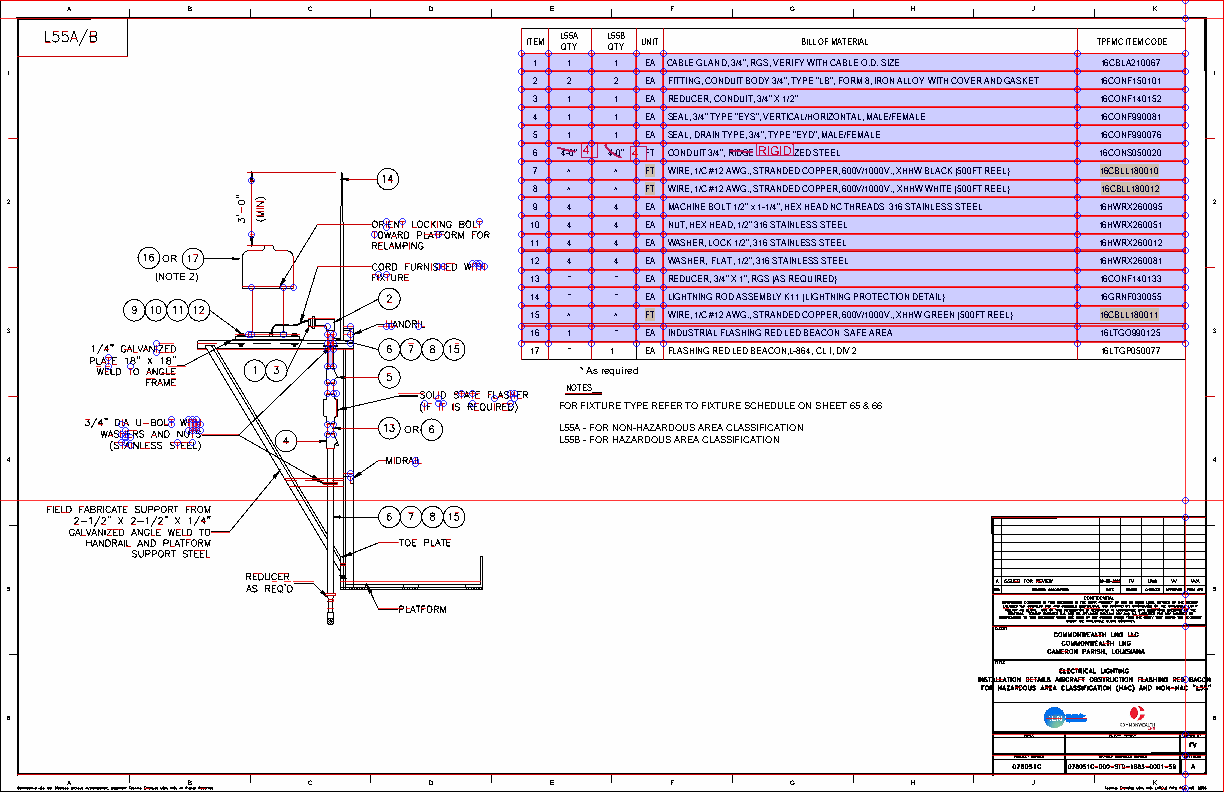

In [131]:
im.debug_tablefinder(table_settings)

In [132]:
table[:3]

[['2',
  '2',
  '2',
  'EA',
  'FITTING, CONDUIT BODY 3/4", TYPE "LB", FORM 8, IRON ALLOY WITH COVER AND GASKET',
  '16CONF150101'],
 ['3', '1', '1', 'EA', 'REDUCER, CONDUIT, 3/4" X 1/2"', '16CONF140152'],
 ['4',
  '1',
  '1',
  'EA',
  'SEAL, 3/4" TYPE "EYS", VERTICAL/HORIZONTAL, MALE/FEMALE',
  '16CONF990081']]